In [1]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters

In [3]:
N = 100000 # Number of episodes
side = 10

In [4]:
# Agent/Environment initialization

In [5]:
env = Environment.square(initial_state_range=1, side = side)

#agent = Agent(GAMMA = 1)
BETA = 5
agent = Agent(env, GAMMA=0.99, ALPHA=0.3 / BETA, BETA=BETA, do_reward = True)
#agent = Agent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


OBS_LEAK = 1e-2 / env.N_obs
#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
#trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)
trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True)

{0: {'E': 1, 'S': 10}, 1: {'E': 2, 'W': 0, 'S': 11}, 2: {'E': 3, 'W': 1, 'S': 12}, 3: {'E': 4, 'W': 2, 'S': 13}, 4: {'E': 5, 'W': 3, 'S': 14}, 5: {'E': 6, 'W': 4, 'S': 15}, 6: {'E': 7, 'W': 5, 'S': 16}, 7: {'E': 8, 'W': 6, 'S': 17}, 8: {'E': 9, 'W': 7, 'S': 18}, 9: {'W': 8, 'S': 19}, 10: {'E': 11, 'S': 20, 'N': 0}, 11: {'E': 12, 'W': 10, 'S': 21, 'N': 1}, 12: {'E': 13, 'W': 11, 'S': 22, 'N': 2}, 13: {'E': 14, 'W': 12, 'S': 23, 'N': 3}, 14: {'E': 15, 'W': 13, 'S': 24, 'N': 4}, 15: {'E': 16, 'W': 14, 'S': 25, 'N': 5}, 16: {'E': 17, 'W': 15, 'S': 26, 'N': 6}, 17: {'E': 18, 'W': 16, 'S': 27, 'N': 7}, 18: {'E': 19, 'W': 17, 'S': 28, 'N': 8}, 19: {'W': 18, 'S': 29, 'N': 9}, 20: {'E': 21, 'S': 30, 'N': 10}, 21: {'E': 22, 'W': 20, 'S': 31, 'N': 11}, 22: {'E': 23, 'W': 21, 'S': 32, 'N': 12}, 23: {'E': 24, 'W': 22, 'S': 33, 'N': 13}, 24: {'E': 25, 'W': 23, 'S': 34, 'N': 14}, 25: {'E': 26, 'W': 24, 'S': 35, 'N': 15}, 26: {'E': 27, 'W': 25, 'S': 36, 'N': 16}, 27: {'E': 28, 'W': 26, 'S': 37, 'N': 1

In [6]:
for i in range(N):
    trainer.run_episode()
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("Total reward got: %.4f" % trainer.total_reward)

1
Trajectory:  [0, 0, 1, 0, 1, 11, 12, 13, 3, 13, 12, 2, 3, 2, 2, 12, 13, 14, 24]
Total reward got: 0.0000
1001
Trajectory:  [1, 2, 12, 13, 14, 15, 16, 17, 27, 26, 16, 15, 14, 15, 16, 26, 25, 15, 5]
Total reward got: 0.0000
2001
Trajectory:  [1, 2, 12, 13, 14, 15, 5, 4, 3, 4, 14, 15, 14, 15, 5, 4, 14, 4, 3]
Total reward got: 0.0000
3001
Trajectory:  [1, 2, 3, 13, 14, 15, 14, 15, 16, 26, 25, 26, 25, 26, 27, 28, 18, 19, 18]
Total reward got: 0.0000
4001
Trajectory:  [0, 1, 2, 12, 13, 23, 24, 23, 22, 32, 42, 41, 42, 43, 53, 63, 73, 83, 82]
Total reward got: 0.0000
5001
Trajectory:  [1, 2, 12, 13, 23, 22, 32, 42, 43, 44, 34, 24, 23, 22, 32, 42, 43, 44, 45]
Total reward got: 0.0000
6001
Trajectory:  [1, 2, 3, 4, 4, 4, 3, 4, 3, 2, 12, 13, 3, 2, 12, 22, 32, 31, 21]
Total reward got: 0.0000
7001
Trajectory:  [1, 2, 2, 12, 22, 32, 31, 41, 51, 52, 51, 52, 62, 63, 62, 61, 71, 61, 62]
Total reward got: 0.0000
8001
Trajectory:  [0, 1, 2, 12, 22, 32, 31, 41, 51, 52, 62, 63, 62, 61, 62, 72, 62, 63, 7

71001
Trajectory:  [0, 1, 11, 21, 22, 23, 33, 34, 44, 45, 35, 36, 37, 38, 39, 39, 39, 29, 19]
Total reward got: 0.0000
72001
Trajectory:  [1, 2, 2, 12, 13, 14, 4, 5, 5, 5, 6, 16, 17, 27, 17, 27, 28, 18, 8]
Total reward got: 0.0000
73001
Trajectory:  [1, 11, 21, 31, 32, 33, 43, 44, 54, 64, 65, 75, 85, 86, 96, 96, 95, 85, 95]
Total reward got: 0.0000
74001
Trajectory:  [1, 1, 1, 2, 12, 13, 14, 13, 12, 22, 12, 22, 12, 13, 14, 24, 34, 35, 45]
Total reward got: 0.0000
75001
Trajectory:  [1, 11, 12, 22, 23, 24, 14, 15, 16, 17, 18, 28, 29, 19, 18, 19, 29, 39, 49]
Total reward got: 0.0000
76001
Trajectory:  [0, 1, 11, 1, 2, 12, 22, 21, 22, 21, 31, 41, 42, 52, 53, 54, 64, 74, 64]
Total reward got: 0.0000
77001
Trajectory:  [1, 1, 11, 12, 22, 21, 22, 32, 31, 32, 42, 52, 62, 63, 73, 83, 84, 94, 84]
Total reward got: 0.0000
78001
Trajectory:  [0, 1, 11, 12, 13, 14, 4, 4, 3, 2, 12, 22, 32, 31, 30, 31, 32, 31, 21]
Total reward got: 0.0000
79001
Trajectory:  [0, 1, 2, 3, 2, 2, 2, 3, 4, 3, 13, 23, 33,

In [7]:
agent.Q_var

array([[ 1.27332378e-09, -3.70462202e+00, -8.23506746e+00,
        -3.87657704e+00],
       [-4.38132993e-02, -8.34290925e-02, -2.14370008e+00,
        -1.51352376e-01],
       [-6.55579116e-02, -1.57386655e-01, -1.11183284e-01,
        -1.82977495e-01],
       [-1.50985152e-01, -5.18452640e-02, -3.18764361e-01,
        -1.95098550e+00],
       [-1.40793526e-01, -2.36653596e-01, -3.05664421e-01,
        -1.84426293e-01],
       [-1.43031069e-01, -2.12420809e-01, -3.06160110e-01,
        -1.96864033e-01],
       [-6.14519789e-02, -2.04926669e-01, -3.01868046e-01,
        -1.83215594e-01],
       [-7.75561733e-03, -8.64141675e-02, -1.85295943e-01,
        -1.80754229e-01],
       [ 2.92626067e-02, -3.04681084e-02, -1.31579690e-01,
        -1.75775813e-02],
       [ 6.85195168e-02,  4.90317130e-02, -4.55778816e-02,
         6.44154604e-02],
       [-3.06550416e+00,  1.40773982e-01, -1.06632303e+00,
        -8.15072574e-02],
       [-2.11767375e-01, -1.83133113e-01, -2.35953484e+00,
      

In [8]:
obs = env.get_observation()
agent.Q_var[0,:]

array([ 1.27332378e-09, -3.70462202e+00, -8.23506746e+00, -3.87657704e+00])

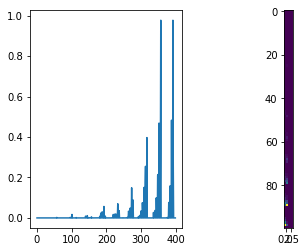

In [9]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)

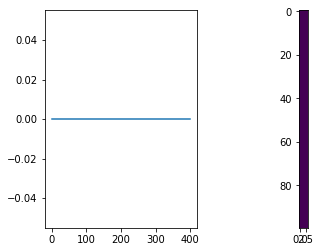

In [10]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)

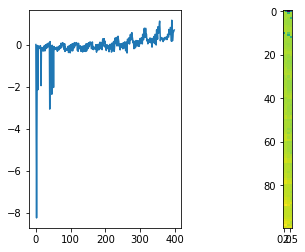

In [11]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)

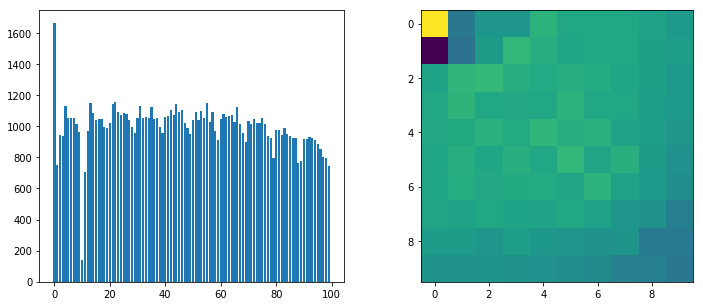

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))

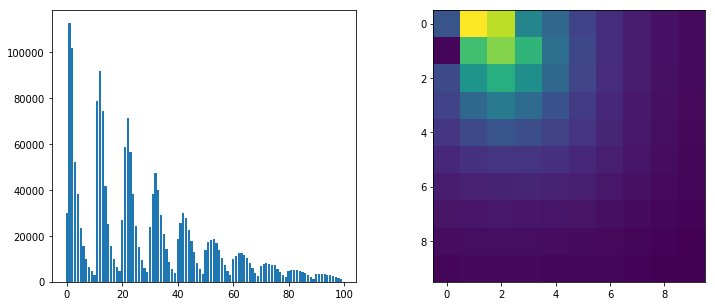

In [13]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))

[ 33.87052724 116.4534738   88.90855319  79.18710028 114.41507912
 108.32641924 104.17520595 107.34529639  99.63484093  93.36143582
  47.29887279 114.29683943 106.45116525 115.8748366  111.55452115
 101.21855418 108.27605411 100.38424741 104.20313241  99.83381266
 122.35714081 122.67882176 106.6953665  101.11806718 116.25160295
 110.17279839 113.9092896  108.54363455  95.88676694  95.93960766
 104.94693722 114.58426933 123.68187408 116.02061036 103.03501186
 110.27786722 101.07308741  99.33921696  94.71714933  93.34607085
 109.94432634 104.06066567 110.41603395 105.9316876  115.73143301
 114.42666935 114.31074919  96.48164324 105.56965931 101.02072316
 103.87145214 112.65773474 107.06782921 108.14900484  99.31337728
 124.40188166 100.62977639 113.48703472  81.15448826  85.6152191
 107.22310094 103.5259613  113.80782385 109.35471614 113.04936224
  85.50717902 106.82221149  90.50283869  96.14126296  89.41407362
 106.88387334 102.33135425 106.53458884 111.92946826 101.12223214
 105.499785

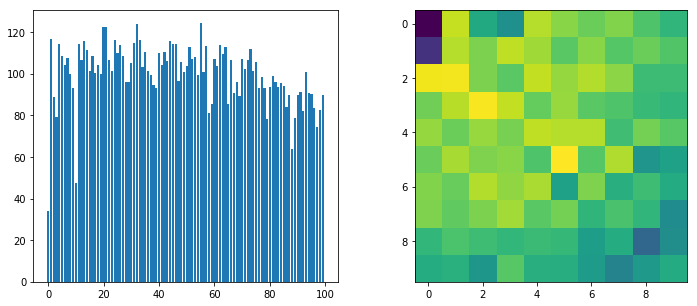

In [14]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))

[ 48.44197534 877.32113258 612.32253396 218.56303708 175.48904549
 137.9309816   98.43709841  53.76772167  30.00243436  17.58556657
  92.6718906  598.96631857 527.95943995 322.99594905 176.63819866
 107.99318979  78.71704353  43.22333829  32.3801549   19.97596307
 228.65780927 458.91604352 425.08599905 295.08866631 155.95760732
  98.06818335  74.96606736  44.20640217  33.85841329  23.07343487
 129.50981366 222.32552082 228.65224257 258.52187867 150.50234274
 100.18650728  68.14514998  38.54614809  30.1531287   25.91223325
  96.23748297 152.10587155 152.1683955  156.08808216 100.72400252
  79.30159719  58.03591587  30.76310005  24.76773035  17.00157243
  64.25336515 120.07049151 118.610082   108.33289777  72.30511953
  50.21239269  51.97129449  31.87065075  21.51677994  12.81462183
  42.37234065  61.34667098  79.54394102  73.41182914  76.12909982
  48.14883544  41.10599365  26.70196567  16.65877679  12.04277575
  41.2540497   47.97637753  59.48745221  42.22720132  47.31600147
  29.86644

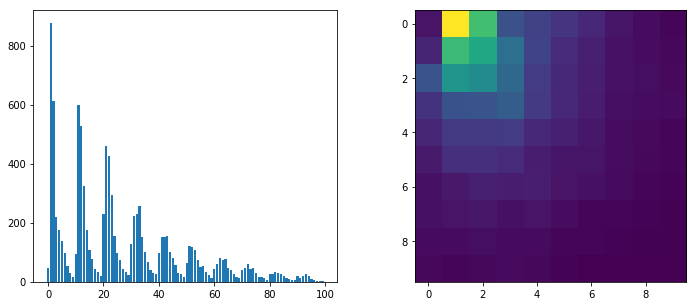

In [15]:
print(trainer.obs_score)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))

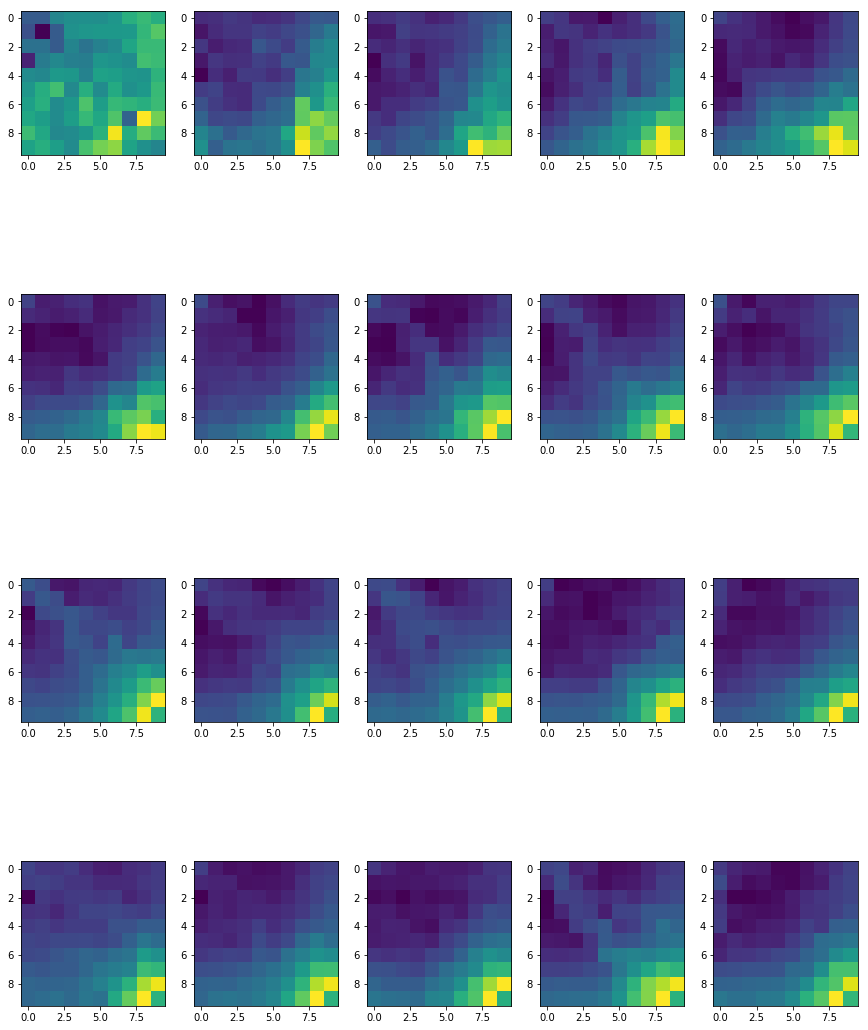

In [16]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//20].reshape(side,side))

In [17]:
trainer.mem_V

{100: array([-5.34992057e-04, -1.25891009e-01, -7.55386047e-02, -6.88335967e-01,
        -3.52568204e-01, -1.14631988e-01, -1.11152765e-01, -6.75913216e-02,
        -1.77981566e-02,  0.00000000e+00, -1.01072690e-01, -9.32932710e-01,
        -1.35499490e+00, -6.22181291e-01, -3.30458388e-01, -5.44628295e-02,
        -4.70641626e-02, -1.77981566e-02,  0.00000000e+00,  0.00000000e+00,
        -3.32747440e-01, -6.93163010e-01, -6.38940522e-01, -7.58739710e-01,
        -2.90138549e-01,  7.04528279e-03,  9.00265364e-04, -5.24473410e-03,
         2.33710038e-02,  0.00000000e+00, -5.61345240e-01, -1.01943990e+00,
        -7.31286391e-01, -7.38434334e-01, -2.28453733e-01, -5.80500222e-02,
        -2.52258570e-03,  3.44738456e-04,  2.33710038e-02,  0.00000000e+00,
        -4.27596316e-01, -5.51411437e-01, -5.21788393e-01, -2.69827368e-01,
        -1.03246575e-01, -5.74413111e-02, -3.05739178e-02, -2.92858130e-02,
         3.30959503e-03,  0.00000000e+00, -1.82150719e-01, -1.93853185e-01,
       